<a href="https://colab.research.google.com/github/UdayKhunt/Machine-Learning-Projects/blob/main/Customer_Segmentation_Using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
X=customer_data.iloc[:,[3,4]].values #taking only last two columns: annual income and spending score

In [7]:
wcss=[]

for i in range(1,11):
  kmeans = KMeans(n_clusters=i , init='k-means++', n_init=10 ,random_state=2)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

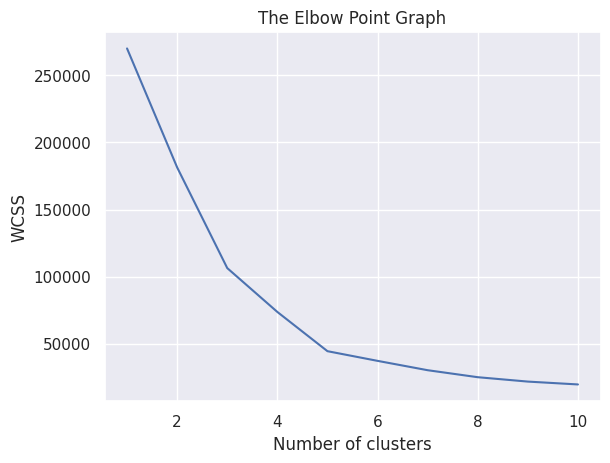

In [8]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=5 , init = 'k-means++' ,n_init=10, random_state=1)

In [10]:
Y=kmeans.fit_predict(X)
print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


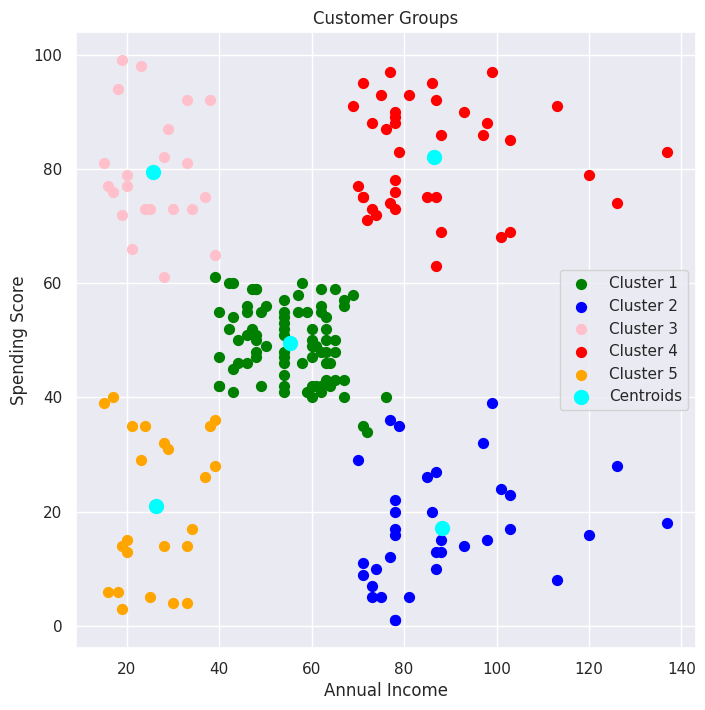

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0] , X[Y==0,1], s = 50 , c='green' , label = 'Cluster 1')
plt.scatter(X[Y==1,0] , X[Y==1,1], s = 50 , c='blue' , label = 'Cluster 2')
plt.scatter(X[Y==2,0] , X[Y==2,1], s = 50 , c='pink' , label = 'Cluster 3')
plt.scatter(X[Y==3,0] , X[Y==3,1], s = 50 , c='red' , label = 'Cluster 4')
plt.scatter(X[Y==4,0] , X[Y==4,1], s = 50 , c='orange' , label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s = 100 , c = 'cyan' , label = 'Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()